Scrap the data Data Cleaning Convert to DataFrame Perform thew data analysis - DC, DE, DM, DV Perform the EDA

# Topics Covered
1. Python
2. Web Scraping - BeautifulSoup, Requests
3. Pandas
4. Google Colab
5. RegEx
6. Matplotlib & Seaborn

# logic to give me url for the first 10 pages

In [54]:
url = 'https://sofifa.com/players'

In [3]:
for i in range(0,541,60):
    print(f"https://sofifa.com/players?offset={i}")

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


In [4]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [5]:
#  Request to the server if am authorised to scrap the dat
req = requests.get(url)
print(req)

<Response [200]>


In [6]:
req.status_code

200

In [7]:
soup = BeautifulSoup(req.content)

In [8]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Sep 1, 2022 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Sep 1, 2022" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2022 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" rel

In [9]:
arr = [i for i in soup.findAll('tr')]

In [10]:
del arr[0]

# Image Link

In [11]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar updated" data-tip-pos="right" role="tooltip">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/233/500/23_60.png" data-srcset="https://cdn.sofifa.net/players/233/500/23_120.png 2x, https://cdn.sofifa.net/players/233/500/23_180.png 3x" data-type="player" id="233500" src="https://cdn.sofifa.net/players/notfound_0_60.png"/>
<div class="tip"><div class="block-quarter half-spacing pure-u-1-1">FIFA 23 Sep 1, 2022</div><div class="block-quarter pure-g"><span class="pure-u-17-24"><span class="bp3-tag p p-67">67</span> <svg class="go-up" height="18" viewbox="0 0 24 24" width="18"><line x1="7" x2="17" y1="17" y2="7"></line><polyline points="7 7 17 7 17 17"></polyline></svg> <span class="bp3-tag p p-68">68</span></span> <abbr class="pure-u-7-24">Crossing</abbr></div><div class="block-quarter pure-g"><span cl

In [15]:
arr[0].find('a',{"role": "tooltip"})

<a aria-label="Luis Sinisterra" data-tip-pos="top" href="/player/233500/luis-sinisterra/230001/" role="tooltip"><div class="ellipsis">L. Sinisterra</div></a>

In [16]:
re.sub('^<img.*data-srcset="| .*/>','', str(arr[1].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/268/460/23_120.png'

# Player Name

In [17]:
arr[0].find('a',{"role": "tooltip"})

<a aria-label="Luis Sinisterra" data-tip-pos="top" href="/player/233500/luis-sinisterra/230001/" role="tooltip"><div class="ellipsis">L. Sinisterra</div></a>

In [18]:
re.sub('^<a.*">|<.*>','',str(arr[0].find('a',{"role": "tooltip"})))

'L. Sinisterra'

# AGE

In [19]:
arr[0].find('td',{"class": "col col-ae"})

<td class="col col-ae" data-col="ae">23</td>

In [20]:
re.sub('^<td.*">|<.*>','',str(arr[0].find('td',{"class": "col col-ae"})))

'23'

# OVA

In [21]:
arr[0].find('td',{"class":"col col-oa"})

<td class="col col-oa" data-col="oa"><span class="bp3-tag p p-80">80</span></td>

In [23]:
re.sub('^<td.*">|<.*>','',str(arr[0].find('td',{"class":"col col-oa"})))

'80'

# POT

In [24]:
arr[0].find('td',{"class":"col col-pt"})

<td class="col col-pt" data-col="pt"><span class="bp3-tag p p-86">86</span></td>

In [25]:
re.sub('^<td.*">|<.*>','',str(arr[0].find('td',{"class":"col col-pt"})))

'86'

# TEAM AND CONTRACT

In [26]:
arr[0].findAll('a')[-1]

<a href="/team/8/leeds-united/">Leeds United</a>

In [27]:
re.sub('^<a.*">|<.*>','',str(arr[0].findAll('a')[-1]))

'Leeds United'

# Period

In [29]:
arr[0].find('div',{"class":"sub"})

<div class="sub">
2022 ~ 2027</div>

In [30]:
re.sub('^<div.*">\n|<.*>','',str(arr[0].find('div',{"class":"sub"})))

'2022 ~ 2027'

# VALUE

In [31]:
arr[0].find('td',{"class":"col col-vl"})

<td class="col col-vl" data-col="vl">€33.5M</td>

In [32]:
re.sub('^<td.*">€|<.*>','',str(arr[0].find('td',{"class":"col col-vl"})))

'33.5M'

# WAGE

In [33]:
arr[0].find('td',{"class":"col col-wg"})

<td class="col col-wg" data-col="wg">€48K</td>

In [34]:
re.sub('^<td.*">€|<.*>','',str(arr[0].find('td',{"class":"col col-wg"})))

'48K'

# TOTAL STATS

In [35]:
arr[0].find('td',{"class":"col col-tt"})

<td class="col col-tt" data-col="tt"><span class="bp3-tag p">2035</span></td>

In [36]:
re.sub('^<td.*">|<.*>','',str(arr[0].find('td',{"class":"col col-tt"})))

'2035'

In [51]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
    url = 'https://sofifa.com/players'
    req = requests.get(url)
    if req.status_code == 200:
        soup = BeautifulSoup(req.content)
        lists = [[] for _ in range(10)]
        
        for i in soup.findAll('tr'):
            image_link = re.sub('^<img.*data-srcset="| .*/>','', str(i.find('img',{"class": "player-check"})))
            Name = re.sub('^<a.*">|<.*>','',str(i.find('a',{"role": "tooltip"})))
            Age = re.sub('^<td.*">|<.*>','',str(i.find('td',{"class": "col col-ae"})))
            Ova = re.sub('^<td.*">|<.*>','',str(i.find('td',{"class":"col col-oa"})))
            POT = re.sub('^<td.*">|<.*>','',str(i.find('td',{"class":"col col-pt"})))
            Team = re.sub('^<a.*">|<.*>','',str(i.findAll('a')[-1]))
            Period = re.sub('^<div.*">\n|<.*>','',str(i.find('div',{"class":"sub"})))
            Value = re.sub('^<td.*">€|<.*>','',str(i.find('td',{"class":"col col-vl"})))
            Wage = re.sub('^<td.*">€|<.*>','',str(i.find('td',{"class":"col col-wg"})))
            Total_stats = re.sub('^<td.*">|<.*>','',str(i.find('td',{"class":"col col-tt"})))
            
            lists[0].append(image_link)
            lists[1].append(Name)
            lists[2].append(Age)
            lists[3].append(Ova)
            lists[4].append(POT)
            lists[5].append(Team)
            lists[6].append(Period)
            lists[7].append(Value)
            lists[8].append(Wage)
            lists[9].append(Total_stats)
            
    fifa = pd.DataFrame({"image_link":lists[0],
                         "Name":lists[1],
                         "Age":lists[2],
                         "Ova":lists[3],
                         "POT":lists[4],
                         "Team":lists[5],
                         "Period":lists[6],
                         "Value":lists[7],
                         "Wage":lists[8],
                         "Total_stats":lists[9]})  
    #Dropping the first row to remove NAN values
    # inplace true is for permanent change
    fifa.drop(0, inplace=True)

    #UPDATING
    #Age, Ova, POT,Total_stats to string
    #fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['Ova'] = pd.to_numeric(fifa['Ova'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    
    # Appending data into our empty dataframe
    fifa_final = fifa_final.append(fifa, ignore_index = True)

C:\Users\josep\AppData\Local\Temp\ipykernel_3324\667142540.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index = True)
C:\Users\josep\AppData\Local\Temp\ipykernel_3324\667142540.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index = True)
C:\Users\josep\AppData\Local\Temp\ipykernel_3324\667142540.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_final.append(fifa, ignore_index = True)
C:\Users\josep\AppData\Local\Temp\ipykernel_3324\667142540.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_final = fifa_fina

In [57]:
fifa_final.head()

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/233/500/23_120.png,L. Sinisterra,23,80,86,Leeds United,2022 ~ 2027,33.5M,48K,2035
1,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,59,81,Central Coast Mariners,2022 ~ 2024,700K,500,1453
2,https://cdn.sofifa.net/players/260/592/23_120.png,B. Šeško,19,72,85,FC Red Bull Salzburg,2021 ~ 2026,5.5M,13K,1810
3,https://cdn.sofifa.net/players/256/516/23_120.png,Nico Williams,19,74,86,Athletic Club de Bilbao,2020 ~ 2024,10M,13K,1800
4,https://cdn.sofifa.net/players/246/053/23_120.png,J. Gelhardt,20,72,87,Leeds United,2020 ~ 2027,5.5M,22K,1768


In [59]:
# Checking dataframe type
fifa_final['Age'].dtypes

dtype('O')

In [56]:
fifa_final.tail()

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
595,https://cdn.sofifa.net/players/233/301/23_120.png,R. Kristensen,24,77,82,Leeds United,2022 ~ 2027,15M,31K,2070
596,https://cdn.sofifa.net/players/244/067/23_120.png,M. Lacroix,22,77,86,VfL Wolfsburg,2020 ~ 2025,22M,34K,1736
597,https://cdn.sofifa.net/players/258/906/23_120.png,W. Gnonto,18,69,85,FC Zürich,2020 ~ 2023,3.6M,4K,1741
598,https://cdn.sofifa.net/players/236/772/23_120.png,D. Szoboszlai,21,79,87,RB Leipzig,2021 ~ 2026,39.5M,41K,1990
599,https://cdn.sofifa.net/players/242/530/23_120.png,N. Okafor,22,75,83,FC Red Bull Salzburg,2020 ~ 2024,12.5M,25K,1894


In [60]:
len(fifa_final)

600

In [62]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    object
 3   Ova          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Period       600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.0+ KB


In [63]:
# Gives statistal information for rows with numerical values
fifa_final.describe()

,Ova,POT,Total_stats
count,600.000000,600.000000,600.000000
mean,77.351667,86.956667,1910.881667
std,6.953554,3.035921,170.350912
min,59.000000,79.000000,1453.000000
25%,73.000000,85.000000,1798.750000
50%,78.000000,87.000000,1921.000000
75%,83.000000,89.000000,2035.500000
max,91.000000,94.000000,2196.000000


# How many null values are there in each column

In [64]:
fifa_final.isnull().sum()

image_link     0
Name           0
Age            0
Ova            0
POT            0
Team           0
Period         0
Value          0
Wage           0
Total_stats    0
dtype: int64

# How many null values are there in a dataset

In [86]:
fifa_final.isnull().sum()#.sum()

image_link     0
Name           0
Age            0
Ova            0
POT            0
Team           0
Period         0
Value          0
Wage           0
Total_stats    0
dtype: int64

# Check the duplicate values in the dataset

In [87]:
fifa_final.duplicated().sum()

0

# Showing all the duplicated values

In [81]:
fifa_final[fifa_final.duplicated()]


,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats


In [88]:
fifa_final.drop_duplicates(inplace=True)

In [89]:
fifa_final.shape

(61, 10)

In [90]:
fifa_final.tail()

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
56,https://cdn.sofifa.net/players/235/805/23_120.png,F. Chiesa,24,84,90,Juventus,2022 ~ 2025,66.5M,140K,2073
57,https://cdn.sofifa.net/players/244/067/23_120.png,M. Lacroix,22,77,86,VfL Wolfsburg,2020 ~ 2025,22M,34K,1736
58,https://cdn.sofifa.net/players/262/113/23_120.png,N. Zalewski,20,74,86,Roma,2019 ~ 2025,10M,34K,1844
59,https://cdn.sofifa.net/players/242/530/23_120.png,N. Okafor,22,75,83,FC Red Bull Salzburg,2020 ~ 2024,12.5M,25K,1894
238,https://cdn.sofifa.net/players/233/301/23_120.png,R. Kristensen,24,77,82,Leeds United,2022 ~ 2027,15M,31K,2070


In [91]:
fifa_final.head()

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/233/500/23_120.png,L. Sinisterra,23,80,86,Leeds United,2022 ~ 2027,33.5M,48K,2035
1,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,59,81,Central Coast Mariners,2022 ~ 2024,700K,500,1453
2,https://cdn.sofifa.net/players/260/592/23_120.png,B. Šeško,19,72,85,FC Red Bull Salzburg,2021 ~ 2026,5.5M,13K,1810
3,https://cdn.sofifa.net/players/256/516/23_120.png,Nico Williams,19,74,86,Athletic Club de Bilbao,2020 ~ 2024,10M,13K,1800
4,https://cdn.sofifa.net/players/246/053/23_120.png,J. Gelhardt,20,72,87,Leeds United,2020 ~ 2027,5.5M,22K,1768


In [102]:
# Delete the columns - index, image_list, Duration
fifa_final.drop(['image_link'], axis=1 )

,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
0,L. Sinisterra,23,80,86,Leeds United,2022 ~ 2027,33.5M,48K,2035
1,G. Kuol,17,59,81,Central Coast Mariners,2022 ~ 2024,700K,500,1453
2,B. Šeško,19,72,85,FC Red Bull Salzburg,2021 ~ 2026,5.5M,13K,1810
3,Nico Williams,19,74,86,Athletic Club de Bilbao,2020 ~ 2024,10M,13K,1800
4,J. Gelhardt,20,72,87,Leeds United,2020 ~ 2027,5.5M,22K,1768
...,...,...,...,...,...,...,...,...,...
56,F. Chiesa,24,84,90,Juventus,2022 ~ 2025,66.5M,140K,2073
57,M. Lacroix,22,77,86,VfL Wolfsburg,2020 ~ 2025,22M,34K,1736
58,N. Zalewski,20,74,86,Roma,2019 ~ 2025,10M,34K,1844
59,N. Okafor,22,75,83,FC Red Bull Salzburg,2020 ~ 2024,12.5M,25K,1894


In [103]:
fifa_final

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/233/500/23_120.png,L. Sinisterra,23,80,86,Leeds United,2022 ~ 2027,33.5M,48K,2035
1,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,59,81,Central Coast Mariners,2022 ~ 2024,700K,500,1453
2,https://cdn.sofifa.net/players/260/592/23_120.png,B. Šeško,19,72,85,FC Red Bull Salzburg,2021 ~ 2026,5.5M,13K,1810
3,https://cdn.sofifa.net/players/256/516/23_120.png,Nico Williams,19,74,86,Athletic Club de Bilbao,2020 ~ 2024,10M,13K,1800
4,https://cdn.sofifa.net/players/246/053/23_120.png,J. Gelhardt,20,72,87,Leeds United,2020 ~ 2027,5.5M,22K,1768
...,...,...,...,...,...,...,...,...,...,...
56,https://cdn.sofifa.net/players/235/805/23_120.png,F. Chiesa,24,84,90,Juventus,2022 ~ 2025,66.5M,140K,2073
57,https://cdn.sofifa.net/players/244/067/23_120.png,M. Lacroix,22,77,86,VfL Wolfsburg,2020 ~ 2025,22M,34K,1736
58,https://cdn.sofifa.net/players/262/113/23_120.png,N. Zalewski,20,74,86,Roma,2019 ~ 2025,10M,34K,1844
59,https://cdn.sofifa.net/players/242/530/23_120.png,N. Okafor,22,75,83,FC Red Bull Salzburg,2020 ~ 2024,12.5M,25K,1894


# Find all the (name) Player who is having the highest wage

# Find all the youghest players

In [106]:
fifa_final.sort_values(by='Age',ascending=False)

,image_link,Name,Age,Ova,POT,Team,Period,Value,Wage,Total_stats
41,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2159
15,https://cdn.sofifa.net/players/158/023/23_120.png,L. Messi,35,91,91,Paris Saint-Germain,2021 ~ 2023,54M,195K,2190
49,https://cdn.sofifa.net/players/190/871/23_120.png,Neymar Jr,30,89,89,Paris Saint-Germain,2017 ~ 2025,99.5M,200K,2157
38,https://cdn.sofifa.net/players/216/201/23_120.png,Iñaki Williams,28,81,81,Athletic Club de Bilbao,2012 ~ 2028,26.5M,40K,2055
45,https://cdn.sofifa.net/players/215/716/23_120.png,A. Mitrović,27,78,79,Fulham,2018 ~ 2024,16.5M,63K,1818
...,...,...,...,...,...,...,...,...,...,...
24,https://cdn.sofifa.net/players/240/833/23_120.png,Y. Moukoko,17,69,88,Borussia Dortmund,2020 ~ 2023,3.5M,4K,1733
25,https://cdn.sofifa.net/players/268/421/23_120.png,M. Tel,17,64,84,FC Bayern München,2022 ~ 2027,1.6M,2K,1632
29,https://cdn.sofifa.net/players/264/240/23_120.png,Gavi,17,79,89,FC Barcelona,2020 ~ 2023,36M,17K,2010
21,https://cdn.sofifa.net/players/266/032/23_120.png,J. Bynoe-Gittens,17,67,87,Borussia Dortmund,2022 ~ 2026,2.8M,2K,1586


# plot a graph - First 10 player's Name vs player Wage

# plot a graph - First 10 player's Name vs player POT

# Find the player(s) whose potential is more than 90

# Find the player(s) whose potential is more than 90 but the age < 20

# Checking the relation

In [ ]:
#Positive corelation

In [107]:
fifa_final.corr()

,Ova,POT,Total_stats
Ova,1.000000,0.635458,0.827535
POT,0.635458,1.000000,0.472995
Total_stats,0.827535,0.472995,1.000000


<AxesSubplot:>

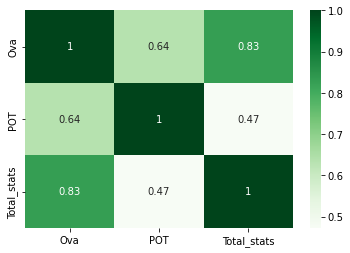

In [108]:
sns.heatmap(fifa_final.corr(), annot=True, cmap="Greens")